In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Preparing and Exploring the dataset

In [2]:
# Loading the dataset
maternal_health_risk_data = pd.read_csv('Maternal Health Risk Data Set.csv')
maternal_health_risk_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
maternal_health_risk_data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [4]:
# Changing the categorical data to numerical
maternal_health_risk_data['RiskLevel'] = maternal_health_risk_data['RiskLevel'].replace(['high risk', 'mid risk', 'low risk'], [2, 1, 0])
maternal_health_risk_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [5]:
maternal_health_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [6]:
maternal_health_risk_data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


In [7]:
maternal_health_risk_data.shape

(1014, 7)

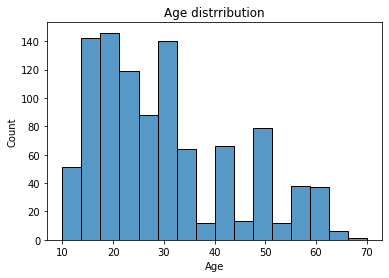

In [8]:
# Plotting the Age distribution of dataset
sns.histplot(maternal_health_risk_data.Age)
plt.title('Age distrribution')
plt.show()

Visualizing the classes in the class label

In [9]:
maternal_health_risk_data['RiskLevel'].value_counts()

0    406
1    336
2    272
Name: RiskLevel, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


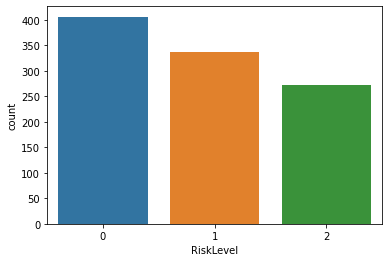

In [10]:
sns.countplot(maternal_health_risk_data['RiskLevel'])

Building and Training the Neural Network

In [11]:
# Splitting the dataset into the Training set and the Test set
X = (maternal_health_risk_data.drop('RiskLevel', axis=1)).values
y = (maternal_health_risk_data['RiskLevel']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=99)

In [12]:
# Standardizing the train and test dataset
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [13]:
X_train_s.shape

(760, 6)

In [14]:
# Instantiating the model and adding layers to the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(6,)))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [15]:
# Compiling the model and selecting an optimizer and a loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Weighting the classes and fitting the model
class_weights = {0:1, 1:2, 2:3}

history = model.fit(X_train_s, y_train, batch_size=8, epochs=50, verbose=2, class_weight=class_weights, validation_split=0.25)

Epoch 1/50
72/72 - 4s - loss: 1.8860 - accuracy: 0.3614 - val_loss: 1.0586 - val_accuracy: 0.4211 - 4s/epoch - 58ms/step
Epoch 2/50
72/72 - 0s - loss: 1.7486 - accuracy: 0.4456 - val_loss: 1.0102 - val_accuracy: 0.4895 - 401ms/epoch - 6ms/step
Epoch 3/50
72/72 - 0s - loss: 1.6615 - accuracy: 0.4895 - val_loss: 0.9767 - val_accuracy: 0.4947 - 362ms/epoch - 5ms/step
Epoch 4/50
72/72 - 0s - loss: 1.5949 - accuracy: 0.5070 - val_loss: 0.9444 - val_accuracy: 0.5263 - 490ms/epoch - 7ms/step
Epoch 5/50
72/72 - 0s - loss: 1.5391 - accuracy: 0.5439 - val_loss: 0.9167 - val_accuracy: 0.5526 - 343ms/epoch - 5ms/step
Epoch 6/50
72/72 - 1s - loss: 1.4908 - accuracy: 0.5719 - val_loss: 0.8958 - val_accuracy: 0.5737 - 537ms/epoch - 7ms/step
Epoch 7/50
72/72 - 0s - loss: 1.4500 - accuracy: 0.5684 - val_loss: 0.8825 - val_accuracy: 0.5684 - 351ms/epoch - 5ms/step
Epoch 8/50
72/72 - 0s - loss: 1.4119 - accuracy: 0.5754 - val_loss: 0.8647 - val_accuracy: 0.5947 - 309ms/epoch - 4ms/step
Epoch 9/50
72/72 -

Evaluating the Neural Network

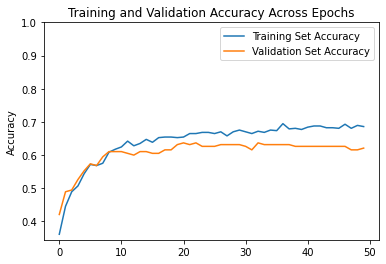

In [18]:
# Plotting the training and validation accuracy
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

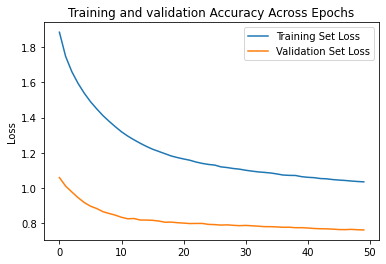

In [19]:
# Plotting the training and validation loss
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and validation Accuracy Across Epochs')
plt.legend()

In [20]:
# Generating predictions for the test data
y_pred = model.predict(X_test_s)
y_pred = y_pred.argmax(axis=1)

8/8 [==============================] - 0s 2ms/step


In [21]:
y_test

array([1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2,
       0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2,
       0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 2,
       0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1,
       2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0,
       0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0,
       2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2,
       2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2])

In [22]:
y_pred

array([1, 1, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2,
       0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1,
       0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1,
       1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0,
       0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0,
       0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2,
       2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2])

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

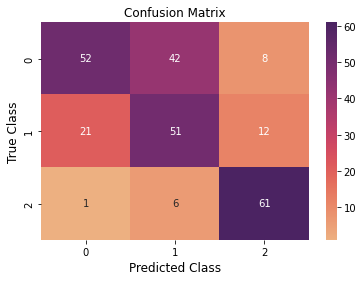

In [24]:
# Evaluating the model performance on the test data
confusion_matrix_value = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(confusion_matrix_value, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)

plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.51      0.59       102
           1       0.52      0.61      0.56        84
           2       0.75      0.90      0.82        68

    accuracy                           0.65       254
   macro avg       0.66      0.67      0.66       254
weighted avg       0.65      0.65      0.64       254

